## Seattle Airbnb Open Data Science Blog

#### Section 1: Understanding the business

## This section is there questions that need to be investigated:

> 1: Is there a relationship between the day price of the Airbnb place and number of guests?

> 2: What makes a great Airbnb in Seattle, is the number of people that can stay or it it the maximum number of night you can stay?

> 3: What are the customers that stay in these Airbnb in Seattle saying about the host and location in there review, let's compare please with listing that have high reviews_per_month with low reviews_per_month to determine keywords that make a great Airbnb stay in Settle


#### Section 2: Understanding the data

##### Gather Data:

> The kaggle Seattle Airbnb Open website contains the three data source for this project.  The kaggle website requires 
an user account to download the three Seattle Airbnb Open data sets.  I have an kaggle account,however if you do not 
have an account the link to main kaggle page is below, just follow the links to create an account, as well as the main kaggle Seattle Airbnb Open website and expected data files.

- Main kaggle website: https://www.kaggle.com

- kaggle Seattle Airbnb Open website Link: https://www.kaggle.com/airbnb/seattle
        
##### Expected kaggle Seattle Airbnb Open data sets:

- calendar
- listings
- reviews

#### Describe data 


##### Context

kaggle Seattle Airbnb Open data set contain listing and descriptions of the Airbnb. Also include is the activities with in the area of the homestays in Seattle, WA.


#### Content

kaggle Seattle Airbnb Open data set contains

- Listings
- full descriptions
- average review score
- Reviews including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

##### 2:1 Load packages

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from wordcloud import WordCloud

##### 2:2 Load Data

In [35]:
# Load Data
calendar = pd.read_csv("calendar.csv")
calendar.head(1)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00


In [36]:
# Load Data
listings = pd.read_csv("listings.csv")
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [37]:
# Load Data
reviews = pd.read_csv("reviews.csv")
reviews.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...


##### 2:3 Exploring data

###### Asses Data:

##### Visual Assessment - Verifying quality of data section

###### Calendar Data Set

In [38]:
# Access Data 
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [39]:
# Access Data 
calendar.tail()

,listing_id,date,available,price
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN
1393569,10208623,2017-01-02,f,NaN


##### Visual Assessment 

- available: When the value is t there a price and f there an Nan Value.
- price: has a $ sign, this will be removed.

#### Listings Data Set

In [40]:
# Access Data 
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [41]:
# Access Data 
listings.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.3
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3817,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


##### Visual Assessment 

There are 92 Columns in this data set. 

Summary:

- space: Contains a description of the space and missing values. 
- experiences_offered: Appears to only display the word None. 
- neighborhood_overview: Contains a description of the neighborhood and missing values
- review_scores_value: Contains review scorce and missing values. 
- license contains missing values. 
- jurisdiction_names Appears to only display the word WASHINGTON.
- cancellation_policy: Contains three different status: flexible,moderate,strict
- reviews_per_month: Contain the review per a Month and Nan values. 

#### Reviews Data Set

In [42]:
# Access Data 
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [43]:
# Access Data 
reviews.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."
84848,9727246,56429621,2015-12-13,30860360,Stephanie,"Breanne was a great host. Check in was easy, s..."


##### Visual Assessment

- listing_id: Listing Airbnb Id
- id: ID field. Not sure what this relates to. Further investigation. 
- date: Date of review
- reviewer_id - ID of reviewer
- reviewer_name: Name of reviewer
- comments - Review Comments

##### Programmatic assessment - Verifying quality of data section

#### Calendar Data Set

#### Checking Data set Structure

In [44]:
calendar.shape # Access Data 

(1393570, 4)

There are 1393570 rows and 4 columns in the calendar data set

In [45]:
calendar.info() # Access Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


#### Data Types and Missing Values

##### Data Types

- listing_id  int64 - Needs to string.
- date        object - Date Format
- available   object - Format Correct.
- price       object - Change to Float

##### Missing Values

- price contains 934542 values. 

#### Basic Statistics

In [46]:
calendar.describe() # Basic Statistics

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


##### Checking for Missing Values

In [47]:
calendar.isnull().sum().sort_values(axis = 0, ascending = False) # Checking for Null values

price         459028
available          0
date               0
listing_id         0
dtype: int64

#### Visualisation Missing Values. 

### Create a heatmap Function for Missing Values

In [48]:
def plot_NA(df):
    df 
    # heatmap for missing values .
    return sns.heatmap(df.isnull(), cbar=False) 

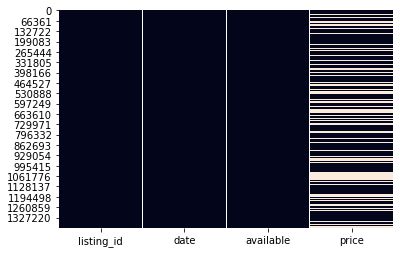

In [49]:
plot_NA(df = calendar)

#### Checking for Duplciates

In [50]:
calendar.duplicated().sum() # checking for duplicates

0

#### Checking date range

In [51]:
calendar['date'].max() # checking for max values

'2017-01-02'

In [52]:
calendar['date'].min() # checking for Min value

'2016-01-04'

#### Checking available column and how it relates to price:

In [53]:
calendar['available'].unique() # checking for unique values

array(['t', 'f'], dtype=object)

In [54]:
calendar[calendar['available'].str.contains('t')] # checking for value T in the avaiable column. 

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
15,241032,2016-01-19,t,$85.00
16,241032,2016-01-20,t,$85.00
20,241032,2016-01-24,t,$85.00
21,241032,2016-01-25,t,$85.00
22,241032,2016-01-26,t,$85.00


In [55]:
calendar[calendar['available'].str.contains('f')] # checking for value f in the avaiable column. 

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
11,241032,2016-01-15,f,NaN
12,241032,2016-01-16,f,NaN
13,241032,2016-01-17,f,NaN


#### Listings Data Set

#### Checking Data set Structure

In [56]:
listings.shape # Access Data

(3818, 92)

The listing data set contains 3818 rows and 92 columns 

In [57]:
listings.info() # Access Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

#### Basic Statistics

In [58]:
listings.describe() # Basic Statistics

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [59]:
listings['price'].min() # checking for min price. 

'$1,000.00'

In [60]:
listings['price'].max() # checking for max price. 

'$999.00'

##### Checking for Missing Values

In [61]:
listings.isnull().sum().sort_values(axis = 0, ascending = False) # checking for missing values

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

#### Visualisation Missing Values. 

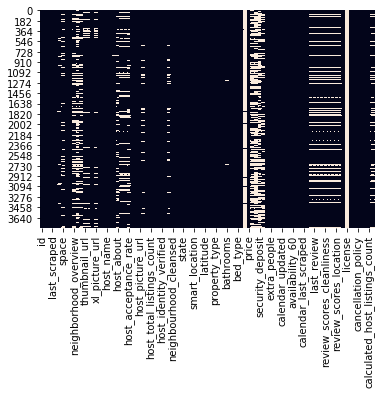

In [62]:
plot_NA(df = listings) # use heat map Function for missing values

#### Review

#### Checking Data set Structure

In [63]:
reviews.shape # access data

(84849, 6)

The review data set contains 84849 rows and 6 columns.

In [64]:
reviews.info() # access data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


#### Basic Statistics

In [66]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


##### Checking for Missing Values

In [67]:
reviews.isnull().sum().sort_values(axis = 0, ascending = False) # checking for missing values

comments         18
reviewer_name     0
reviewer_id       0
date              0
id                0
listing_id        0
dtype: int64

#### Visualisation Missing Values. 

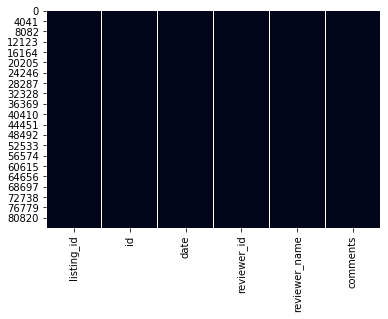

In [68]:
plot_NA(df = reviews) # use heat map Function for missing values

#### Checking for Duplciates

In [69]:
reviews.duplicated().sum() # checking for duplicates

0

#### Section 3: Preparation of data

##### 3:1 Cleaning Section

#### Clean Data

#### 3:2 Report of data cleaning

#### Issues:

#### Drop Columns that are not required.



#### Drop Columns that are not required.


##### calendar

- Available

##### Listing

- listing_url
- scrape_id
- last_scraped
- summary
- space
- description
- experiences_offered
- neighborhood_overview
- notes
- transit
- thumbnail_url
- medium_url
- picture_url
- host_thumbnail_url
- host_picture_url
- street
- amenities
- square_feet
- calendar_updated'

#### Missing Values:

##### calendar

- Price contains missing values, however this relate to days, where the listing is unavailable. Set to Unavailble.

##### calendar

 
##### Remove the Dollar Sign and , from follow data set and columns:

###### calendar_clean
- price

##### listings_clean

- price
- weekly_price
- monthly_price
- security_deposit
- cleaning_fee


##### Define: Change the column format:

###### calendar_clean

- listing_id convert to a string.
- date convert to date format
- price convert to a float

###### listings_clean

- id convert to a string.
- host_id convert to a string.
- price convert to a float
- weekly_price convert to a float
- monthly_price convert to a float
- security_deposit convert to a float
- cleaning_fee convert to a float


######  reviews_clean

- listing_id convert to a string.
- id convert to a string.
- date convert to date format
- reviewer_id convert to a string.

##### Define: Rename columns as there a dupicate names in the data set. 

###### listings_clean
- id rename to listing_id
- price rename to listing_price

###### calendar_clean

- date to calendar_date
- price to day_price

###### reviews_clean
- date to review_date
- id to reviews_id

##### Reset the data set index after merging. 

#### Define: Split the data set too using review per a month.  

- Then extract review comments sectionfor word cloud.

### Missing Values

- This project is not using machine learning or Deep learning. 

### calendar_clean

- Missing values are being replace with 0 in the price columns, as this is when the places are not available and does not impact our corr visuals. 

### listings_clean

- Missing values are being replace with 0, as this is when the places are not available and does not impact our corr visuals for the following columns:

- monthly_price
- security_deposit
- weekly_price
- cleaning_fee

- Other missing values are being remove from the data set.




Code

In [70]:
calendar_clean = calendar.copy() # copying data for cleaning 

In [71]:
listings_clean = listings.copy()  # copying data for cleaning 

In [72]:
reviews_clean = reviews.copy()  # copying data for cleaning 

Test

In [73]:
calendar_clean.head(1) # testing 

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00


In [74]:
listings_clean.head(1) # testing 

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [75]:
reviews_clean.head(1) # testing 

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...


###### Define: Remove columns that are not required for this project:

> ###### calendar_clean Data set:
    
- available

> ###### listings_clean

- listing_url
- scrape_id
- last_scraped
- summary
- space
- description
- experiences_offered
- neighborhood_overview
- notes
- transit
- thumbnail_url
- medium_url
- picture_url
- host_thumbnail_url
- host_picture_url
- street
- amenities
- square_feet
- calendar_updated'



> ###### Review



Code

In [76]:
calendar_clean.drop(['available'],axis=1,inplace=True) # drop columns

In [77]:
listings_clean.drop(['listing_url','scrape_id','last_scraped','summary','space','description','experiences_offered','neighborhood_overview','notes','transit','thumbnail_url','medium_url','picture_url','host_thumbnail_url','host_picture_url','street','amenities','square_feet','calendar_updated'],axis=1,inplace=True) # drop columns

In [78]:
listings_clean.drop(['xl_picture_url','host_url','host_about','requires_license','license','jurisdiction_names','require_guest_profile_picture','require_guest_phone_verification','country_code','country'],axis=1,inplace=True) # drop columns

Test

In [79]:
calendar_clean.head(1) # testing 

,listing_id,date,price
0,241032,2016-01-04,$85.00


In [80]:
listings_clean.head(1) # testing 

,id,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,...,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,2,4.07


In [81]:
reviews_clean.head(1) # testing 

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...


##### Define: Replace Null values in the calendar_clean price column with $0 for plotting time series Graph.

Code

In [82]:
calendar_clean['price'] = calendar_clean['price'].fillna('$0') # replace nan 

Test
 

In [83]:
calendar_clean.isnull().sum() # Checking

listing_id    0
date          0
price         0
dtype: int64

##### Define: Replace Null values in the following Columns With Zero for plotting time series Graph

- monthly_price
- security_deposit
- weekly_price 
- cleaning_fee 


Code

In [84]:
listings_clean['monthly_price'] = listings_clean['monthly_price'].fillna('$0')
listings_clean['security_deposit'] = listings_clean['security_deposit'].fillna('$0')
listings_clean['weekly_price'] = listings_clean['weekly_price'].fillna('$0')
listings_clean['cleaning_fee'] = listings_clean['cleaning_fee'].fillna('$0')

Test

In [85]:
listings_clean.isnull().sum().sort_values(axis = 0, ascending = False)

host_acceptance_rate              773
review_scores_accuracy            658
review_scores_checkin             658
review_scores_value               656
review_scores_location            655
review_scores_cleanliness         653
review_scores_communication       651
review_scores_rating              647
first_review                      627
last_review                       627
reviews_per_month                 627
host_response_time                523
host_response_rate                523
neighbourhood                     416
host_neighbourhood                300
bathrooms                          16
host_location                       8
zipcode                             7
bedrooms                            6
host_listings_count                 2
host_name                           2
host_since                          2
host_identity_verified              2
host_has_profile_pic                2
host_is_superhost                   2
host_total_listings_count           2
beds        

##### Define: Removing values that have missng values. 

Code

In [86]:
listings_clean.dropna(inplace=True)

Test

In [87]:
listings_clean.isnull().sum().sort_values(axis = 0, ascending = False)

reviews_per_month               0
host_identity_verified          0
room_type                       0
property_type                   0
is_location_exact               0
longitude                       0
latitude                        0
smart_location                  0
market                          0
zipcode                         0
state                           0
city                            0
neighbourhood_group_cleansed    0
neighbourhood_cleansed          0
neighbourhood                   0
host_has_profile_pic            0
bathrooms                       0
host_verifications              0
host_total_listings_count       0
host_listings_count             0
host_neighbourhood              0
host_is_superhost               0
host_acceptance_rate            0
host_response_rate              0
host_response_time              0
host_location                   0
host_since                      0
host_name                       0
host_id                         0
name          

##### Define: Remove the Dollar Sign and , from follow data set and colums:

###### calendar_clean
- price

##### listings_clean

- price
- weekly_price
- monthly_price
- security_deposit
- cleaning_fee


Code

In [88]:
calendar_clean['price'] = calendar_clean['price'].apply(lambda x: x.replace('$',''))

In [89]:
calendar_clean['price'] = calendar_clean['price'].apply(lambda x: x.replace(',',''))

In [90]:
listings_clean['price'] = calendar_clean['price'].apply(lambda x: x.replace('$',''))

In [91]:
listings_clean['price'] = listings_clean['price'].apply(lambda x: x.replace(',',''))

In [92]:
listings_clean['weekly_price'] = listings_clean['weekly_price'].apply(lambda x: x.replace('$',''))

In [93]:
listings_clean['weekly_price'] = listings_clean['weekly_price'].apply(lambda x: x.replace(',',''))

In [94]:
listings_clean['monthly_price'] = listings_clean['monthly_price'].apply(lambda x: x.replace('$',''))

In [95]:
listings_clean['monthly_price'] = listings_clean['monthly_price'].apply(lambda x: x.replace(',',''))

In [96]:
listings_clean['security_deposit'] = listings_clean['security_deposit'].apply(lambda x: x.replace('$',''))

In [97]:
listings_clean['security_deposit'] = listings_clean['security_deposit'].apply(lambda x: x.replace(',',''))

In [98]:
listings_clean['cleaning_fee'] = listings_clean['monthly_price'].apply(lambda x: x.replace('$',''))

In [99]:
listings_clean['cleaning_fee'] = listings_clean['monthly_price'].apply(lambda x: x.replace(',',''))

Test

In [100]:
calendar_clean['price'].unique()

array(['85.00', '0', '125.00', '154.00', '164.00', '165.00', '150.00',
       '145.00', '144.00', '148.00', '155.00', '149.00', '156.00',
       '166.00', '152.00', '147.00', '146.00', '151.00', '158.00',
       '168.00', '169.00', '192.00', '175.00', '162.00', '171.00',
       '173.00', '153.00', '177.00', '183.00', '181.00', '170.00',
       '179.00', '167.00', '184.00', '186.00', '172.00', '180.00',
       '190.00', '178.00', '196.00', '197.00', '202.00', '198.00',
       '205.00', '214.00', '218.00', '211.00', '193.00', '204.00',
       '189.00', '187.00', '194.00', '185.00', '206.00', '191.00',
       '207.00', '208.00', '188.00', '200.00', '209.00', '210.00',
       '195.00', '201.00', '199.00', '203.00', '182.00', '163.00',
       '159.00', '157.00', '142.00', '136.00', '134.00', '137.00',
       '143.00', '135.00', '141.00', '130.00', '138.00', '133.00',
       '129.00', '127.00', '126.00', '131.00', '132.00', '220.00',
       '222.00', '223.00', '232.00', '217.00', '229.00', '

In [101]:
listings_clean['price'].unique()

array(['85.00', '0', '125.00', '154.00', '164.00', '155.00', '165.00',
       '150.00', '145.00', '144.00', '148.00', '156.00', '147.00',
       '158.00', '168.00', '192.00', '175.00', '162.00', '171.00',
       '173.00', '166.00', '177.00', '183.00', '179.00', '181.00',
       '167.00', '184.00', '186.00', '172.00', '190.00', '178.00',
       '196.00', '197.00', '205.00', '214.00', '193.00', '202.00',
       '189.00', '187.00', '194.00', '185.00', '200.00', '209.00',
       '201.00', '211.00', '191.00', '210.00', '195.00', '199.00',
       '207.00', '206.00', '182.00', '198.00', '163.00', '180.00',
       '159.00', '157.00', '151.00', '152.00', '142.00', '134.00',
       '137.00', '138.00', '133.00', '129.00', '127.00', '131.00',
       '220.00', '222.00', '232.00', '217.00', '203.00', '204.00',
       '229.00', '400.00', '975.00', '750.00', '500.00', '650.00',
       '675.00', '1250.00', '1450.00', '1650.00', '100.00', '600.00',
       '450.00', '475.00', '120.00', '140.00', '80.00',

In [102]:
listings_clean['weekly_price'].unique()

array(['0', '1000.00', '575.00', '360.00', '595.00', '800.00', '568.00',
       '3000.00', '500.00', '699.00', '1325.00', '450.00', '950.00',
       '540.00', '700.00', '650.00', '3035.00', '351.00', '1300.00',
       '900.00', '945.00', '750.00', '549.00', '910.00', '555.00',
       '1800.00', '590.00', '1500.00', '350.00', '1200.00', '2100.00',
       '499.00', '525.00', '530.00', '550.00', '274.00', '559.00',
       '420.00', '400.00', '300.00', '1065.00', '698.00', '536.00',
       '1260.00', '600.00', '625.00', '2900.00', '440.00', '690.00',
       '582.00', '805.00', '232.00', '715.00', '640.00', '1600.00',
       '895.00', '925.00', '720.00', '1015.00', '6300.00', '428.00',
       '1650.00', '425.00', '3150.00', '541.00', '1005.00', '730.00',
       '2500.00', '1040.00', '1380.00', '915.00', '725.00', '1400.00',
       '990.00', '770.00', '1460.00', '630.00', '619.00', '896.00',
       '432.00', '790.00', '1470.00', '250.00', '275.00', '393.00',
       '395.00', '325.00', '3250.

In [103]:
listings_clean['monthly_price'].unique()

array(['0', '3000.00', '2000.00', '5000.00', '2029.00', '3200.00',
       '2388.00', '4650.00', '2700.00', '1500.00', '2950.00', '1911.00',
       '12140.00', '3950.00', '3750.00', '3970.00', '3402.00', '1850.00',
       '1795.00', '2250.00', '5500.00', '1250.00', '4950.00', '7000.00',
       '1600.00', '1900.00', '1974.00', '1899.00', '1300.00', '1100.00',
       '3759.00', '2552.00', '1875.00', '2300.00', '1450.00', '1800.00',
       '3450.00', '2200.00', '3800.00', '819.00', '2205.00', '3150.00',
       '2500.00', '3625.00', '19500.00', '1512.00', '11700.00', '3900.00',
       '4000.00', '3850.00', '3528.00', '1995.00', '1950.00', '4960.00',
       '2400.00', '2184.00', '3600.00', '3045.00', '1780.00', '1350.00',
       '2100.00', '2649.00', '1990.00', '5964.00', '750.00', '850.00',
       '3500.00', '1386.00', '1389.00', '9500.00', '2900.00', '3700.00',
       '2940.00', '520.00', '990.00', '1499.00', '6300.00', '950.00',
       '4100.00', '1395.00', '1197.00', '4410.00', '1999.00'

In [104]:
listings_clean['cleaning_fee'].unique()

array(['0', '3000.00', '2000.00', '5000.00', '2029.00', '3200.00',
       '2388.00', '4650.00', '2700.00', '1500.00', '2950.00', '1911.00',
       '12140.00', '3950.00', '3750.00', '3970.00', '3402.00', '1850.00',
       '1795.00', '2250.00', '5500.00', '1250.00', '4950.00', '7000.00',
       '1600.00', '1900.00', '1974.00', '1899.00', '1300.00', '1100.00',
       '3759.00', '2552.00', '1875.00', '2300.00', '1450.00', '1800.00',
       '3450.00', '2200.00', '3800.00', '819.00', '2205.00', '3150.00',
       '2500.00', '3625.00', '19500.00', '1512.00', '11700.00', '3900.00',
       '4000.00', '3850.00', '3528.00', '1995.00', '1950.00', '4960.00',
       '2400.00', '2184.00', '3600.00', '3045.00', '1780.00', '1350.00',
       '2100.00', '2649.00', '1990.00', '5964.00', '750.00', '850.00',
       '3500.00', '1386.00', '1389.00', '9500.00', '2900.00', '3700.00',
       '2940.00', '520.00', '990.00', '1499.00', '6300.00', '950.00',
       '4100.00', '1395.00', '1197.00', '4410.00', '1999.00'

##### Define: Change the column format:

###### calendar_clean

- listing_id convert to a string.
- date convert to date format
- price convert to a float

###### listings_clean

- id
- host_id
- price
- weekly_price
- monthly_price
- security_deposit
- cleaning_fee


######  reviews_clean

- listing_id convert to a string.
- id convert to a string.
- date convert to date format
- reviewer_id convert to a string.

Code

In [105]:
calendar_clean['listing_id'] = calendar_clean['listing_id'].astype(str)
calendar_clean['date'] = pd.to_datetime(calendar_clean['date'])
calendar_clean['price'] = calendar_clean['price'].astype(float)

In [106]:
listings_clean['id'] = listings_clean['id'].astype(str)
listings_clean['host_id'] = listings_clean['host_id'].astype(str)
listings_clean['price'] = listings_clean['price'].astype(float)
listings_clean['weekly_price'] = listings_clean['weekly_price'].astype(float)
listings_clean['monthly_price'] = listings_clean['monthly_price'].astype(float)
listings_clean['security_deposit'] = listings_clean['security_deposit'].astype(float)
listings_clean['cleaning_fee'] = listings_clean['cleaning_fee'].astype(float)

In [107]:
reviews_clean['listing_id'] = reviews_clean['listing_id'].astype(str)
reviews_clean['id'] = reviews_clean['id'].astype(str)
reviews_clean['date'] = pd.to_datetime(reviews_clean['date'])
reviews_clean['reviewer_id'] = reviews_clean['reviewer_id'].astype(str)

Test

In [108]:
calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 3 columns):
listing_id    1393570 non-null object
date          1393570 non-null datetime64[ns]
price         1393570 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 31.9+ MB


In [109]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2397 entries, 0 to 3814
Data columns (total 63 columns):
id                                2397 non-null object
name                              2397 non-null object
host_id                           2397 non-null object
host_name                         2397 non-null object
host_since                        2397 non-null object
host_location                     2397 non-null object
host_response_time                2397 non-null object
host_response_rate                2397 non-null object
host_acceptance_rate              2397 non-null object
host_is_superhost                 2397 non-null object
host_neighbourhood                2397 non-null object
host_listings_count               2397 non-null float64
host_total_listings_count         2397 non-null float64
host_verifications                2397 non-null object
host_has_profile_pic              2397 non-null object
host_identity_verified            2397 non-null object
neighbourho

In [110]:
reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null object
id               84849 non-null object
date             84849 non-null datetime64[ns]
reviewer_id      84849 non-null object
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 3.9+ MB


##### Define: Rename columns as there a dupicate names in the data set. 

###### listings_clean
- id rename to listing_id
- price rename to listing_price

###### calendar_clean

- date to calendar_date
- price to day_price

###### reviews_clean
- date to review_date
- id to reviews_id


Code

In [111]:
listings_clean.rename({'id':'listing_id'},axis=1,inplace=True)

In [112]:
listings_clean.rename({'price':'listing_price'},axis=1,inplace=True)

In [113]:
calendar_clean.rename({'date':'calendar_date'},axis=1,inplace=True)

In [114]:
calendar_clean.rename({'price':'day_price'},axis=1,inplace=True)

In [115]:
reviews_clean.rename({'date':'review_date'},axis=1,inplace=True)

In [116]:
reviews_clean.rename({'id':'reviews_id'},axis=1,inplace=True)

Test

In [117]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2397 entries, 0 to 3814
Data columns (total 63 columns):
listing_id                        2397 non-null object
name                              2397 non-null object
host_id                           2397 non-null object
host_name                         2397 non-null object
host_since                        2397 non-null object
host_location                     2397 non-null object
host_response_time                2397 non-null object
host_response_rate                2397 non-null object
host_acceptance_rate              2397 non-null object
host_is_superhost                 2397 non-null object
host_neighbourhood                2397 non-null object
host_listings_count               2397 non-null float64
host_total_listings_count         2397 non-null float64
host_verifications                2397 non-null object
host_has_profile_pic              2397 non-null object
host_identity_verified            2397 non-null object
neighbourho

In [118]:
calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 3 columns):
listing_id       1393570 non-null object
calendar_date    1393570 non-null datetime64[ns]
day_price        1393570 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 31.9+ MB


In [119]:
reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null object
reviews_id       84849 non-null object
review_date      84849 non-null datetime64[ns]
reviewer_id      84849 non-null object
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 3.9+ MB


#### 3.5: Merged data

##### Define: Merging data Set:

###### Merge 1: listings_clean - calendar_clean

- Left Join on calendar_clean
- Merge on Primary key: listing_id

###### Merge 2: Merge 1 - reviews_clean

- Left Join on reviews_clean
- Merge on Primary key: listing_id

code

In [120]:
merge_1 = pd.merge(listings_clean, calendar_clean, how='left', on='listing_id')

In [121]:
merge_2 = pd.merge(merge_1, reviews_clean, how='left', on='listing_id')

Test

In [122]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874905 entries, 0 to 874904
Data columns (total 65 columns):
listing_id                        874905 non-null object
name                              874905 non-null object
host_id                           874905 non-null object
host_name                         874905 non-null object
host_since                        874905 non-null object
host_location                     874905 non-null object
host_response_time                874905 non-null object
host_response_rate                874905 non-null object
host_acceptance_rate              874905 non-null object
host_is_superhost                 874905 non-null object
host_neighbourhood                874905 non-null object
host_listings_count               874905 non-null float64
host_total_listings_count         874905 non-null float64
host_verifications                874905 non-null object
host_has_profile_pic              874905 non-null object
host_identity_verified          

In [123]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26964740 entries, 0 to 26964739
Data columns (total 70 columns):
listing_id                        object
name                              object
host_id                           object
host_name                         object
host_since                        object
host_location                     object
host_response_time                object
host_response_rate                object
host_acceptance_rate              object
host_is_superhost                 object
host_neighbourhood                object
host_listings_count               float64
host_total_listings_count         float64
host_verifications                object
host_has_profile_pic              object
host_identity_verified            object
neighbourhood                     object
neighbourhood_cleansed            object
neighbourhood_group_cleansed      object
city                              object
state                             object
zipcode               

In [124]:
merge_2.isnull().sum()

listing_id                           0
name                                 0
host_id                              0
host_name                            0
host_since                           0
host_location                        0
host_response_time                   0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_listings_count                  0
host_total_listings_count            0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood                        0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
city                                 0
state                                0
zipcode                              0
market                               0
smart_location                       0
latitude                             0
longitude                

In [125]:
merge_2.duplicated().sum()

0

### Define: Reset the data set index after merging. 

Code

In [126]:
merge_2.reset_index(inplace=True, drop=False)

#### Define: Split the data set too using review per a month.  

- #### Then extract review comments section 


Code

In [127]:
word_1 = merge_2[merge_2['reviews_per_month'] >= 3]

In [128]:
word_2 = merge_2[merge_2['reviews_per_month'] < 3]

In [129]:
wordscloud_1 = word_1['comments']

In [130]:
wordscloud_2 = word_2['comments']

Test

In [131]:
wordscloud_1.shape

(15837350,)

In [132]:
wordscloud_2.shape

(11127390,)

#### Define: Remove duplciate review comments.

Code

In [133]:
wordscloud_1.drop_duplicates(inplace=True)
wordscloud_2.drop_duplicates(inplace=True)

/Users/christopherblycha/anaconda3/lib/python3.7/site-packages/pandas/core/base.py:1512: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self._update_inplace(result)


Test

In [134]:
wordscloud_1.duplicated().sum()

0

In [135]:
wordscloud_2.duplicated().sum()

0

#### Section 4: Modelling

##### Model

##### Visualize

> #### Is there a relationship between the day price of the Airbnb place and number of guests?

In [136]:
# calculate the correlation matrix
corr = merge_2.corr()

### Create a heatmap function

In [142]:
def heatmap(df):
    df 
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(600, 30, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    return sns.heatmap(df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

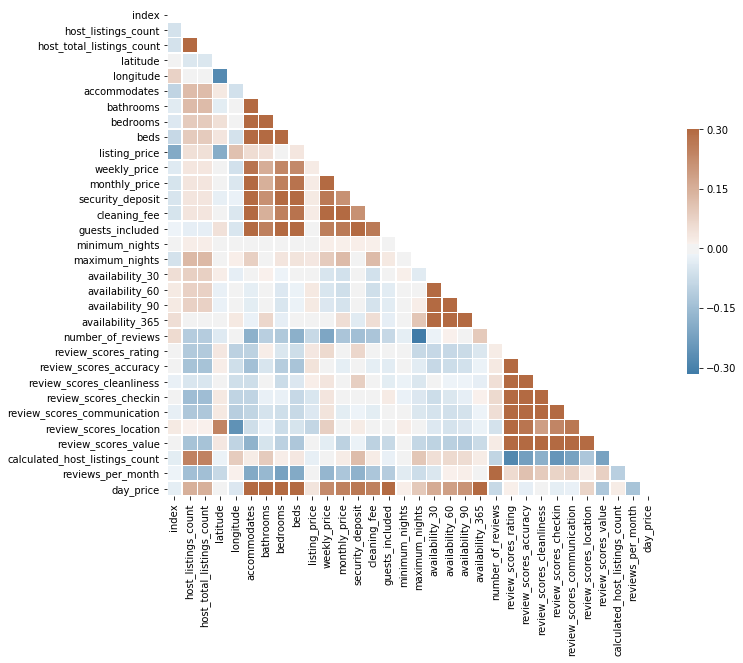

In [143]:
heatmap(df=corr) # use heatmap function

Let's look at the correlation heatmap which basically means: a mutual relationship or connection between two or more things when using a dictionary reference.  In reference to this heat map above , the darker regions of the heatmap indicted a relationship between variables or makers.  These makers are the column names in the table, which as been converted to heatmap.   The colours in the heatmap represent positive or negative relationships between the variables/makers.  When looking at the day_price, we can see a strong relationship between accommodates, bathrooms, bedrooms and beds. 

> #### What makes a great Airbnb in Seattle, is the number of people that can stay or it it the maximum number of night you can stay?

#### Create a clustermap Function:

In [137]:
def clustermap(df):
    df 
    # clustermap for missing values .
    return sns.clustermap(df) 

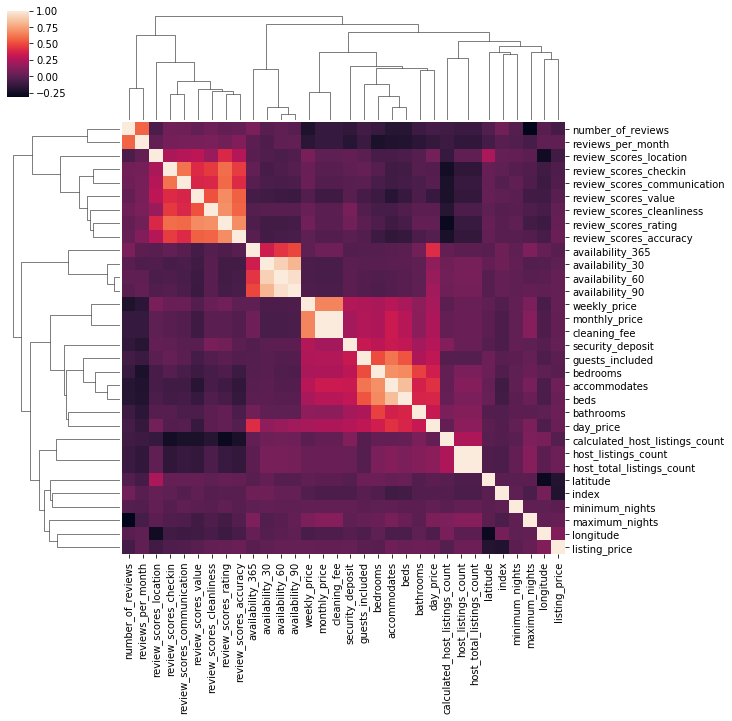

In [138]:
clustermap(df=corr) # use clustermap function

This different type of heatmap, it clusters the variable/columns names together and shows the positive or negative relationships between the variable/columns.  The darker colours  indict a negative relationship, while the lighter colours indict positive relationship.  Looking at this heatmap, we can determine the number of people that can stay at the location  has great impact, than maximum nights.  This is shown by the guests_included, bedrooms, beds and bathrooms, being red hot.  

> #### What are the customers that stay in these Airbnb in Seattle saying about the host and location in there review, let's compare please with listing that have high reviews_per_month with low reviews_per_month to determine keywords that make a great Airbnb stay in Settle?

#### High reviews_per_month

### Create a word cloud function

In [139]:
def word_cloud(df):
    df 
    # Create the wordcloud object
    wordcloud = WordCloud().generate(str(df))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.figure(figsize=(600,800))
    return plt.show()

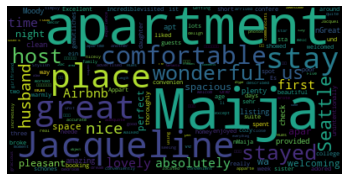

<Figure size 43200x57600 with 0 Axes>

In [140]:
word_cloud(df=wordscloud_1) # use the wordcloud function

Looking at the keywords in the High reviews_per_month word cloud, we can see the Host, comfortable, Apartment, clean are some of the keywords that might a High reviews_per_month in Seattle

Low reviews_per_month  wordcloud:

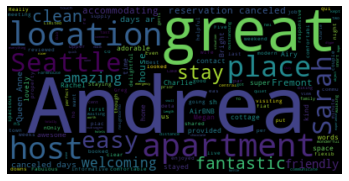

<Figure size 43200x57600 with 0 Axes>

In [141]:
word_cloud(df=wordscloud_2) # use the wordcloud function

Looking at the keywords in the low reviews_per_month word cloud, we can see the Host,  Great location, clean  are some of the keywords positive words, however there are two keywords that are negative in the word clouds, there related to canceled days and reservation canceled, clearly these have an impact and effective the perception of the  Seattle Airbnb.


#### Section 5: Evaluation

### Conclusion: 
What makes are great Seattle Airbnb experience,  looking at the result above we can determine that the number of rooms and beds can have an effective on the Seattle Airbnb experience.  We can also determine that the  number of guests_included,  bathrooms are part of the selection process for people looking to stay at the Airbnb location.  
When looking at the review comments, we can see that the host can add a positive experience to the Airbnb location, however cancellation of the reservation or number of canceled days can impact to listings review. 


#### Section 6: Setting out

https://medium.com/@chrisbnsw/what-makes-a-great-airbnb-in-settle-c506ba84c4e5?sk=28bcd932ccb628e47648bdb576918fc9